In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("wine.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Looking at the dataset we can consider "Class" as the Target variable 
#As there are NoNull values we should fix the distortions in the data if any and start applying our mobel 


In [3]:
df.isnull().sum()
#There are No Null valuses

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [4]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Totaly there are 
178 - Rows 
14 - Columns incluning the Target variable 

Alcohol
Mean-13.0
Std- 0.81
Min(Least Value)-11.03
Median(50th Percentile)-13.05
Max(Highest Value)-14.83

Malic acid
Mean-2.33
Std- 1.12
Min(Least Value)-0.74
Median(50th Percentile)-1.86
Max(Highest Value)-5.80

Ash
Mean-2.36
Std- 0.27
Min(Least Value)-1.36
Median(50th Percentile)-2.36
Max(Highest Value)-3.23

Alcalinity of ash
Mean-19.5
Std- 3.33
Min(Least Value)-10.6
Median(50th Percentile)-19.5
Max(Highest Value)-30

Magnesium
Mean-99.74
Std- 14.28
Min(Least Value)-70
Median(50th Percentile)-98.3
Max(Highest Value)-162

Total phenols
Mean-99.74
Std- 14.28
Min(Least Value)-70
Median(50th Percentile)-98.3
Max(Highest Value)-162

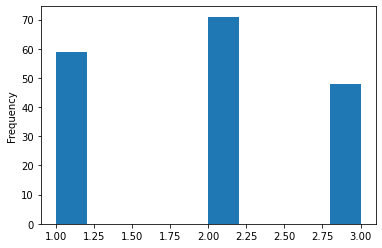

In [6]:
df["Class"].plot.hist()

There are three Catagorical variables in the data defing the class of the wine 
1,2,3

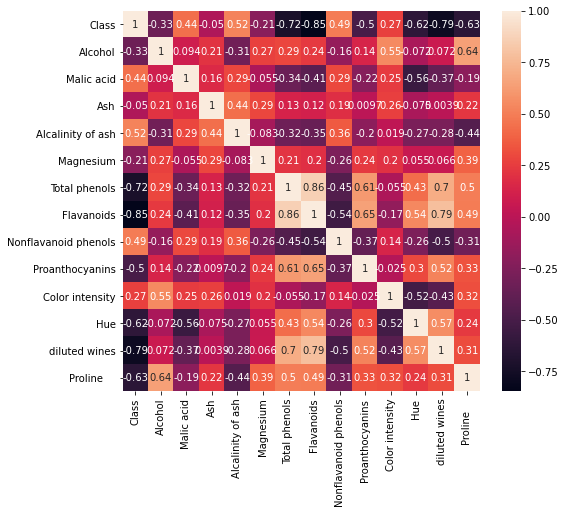

In [5]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()
#we can observe that the "Alcalinity of ash" has a very low corelation with the class so we can drop the column if need be 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F89FD1A4C0>,
      dtype=object)

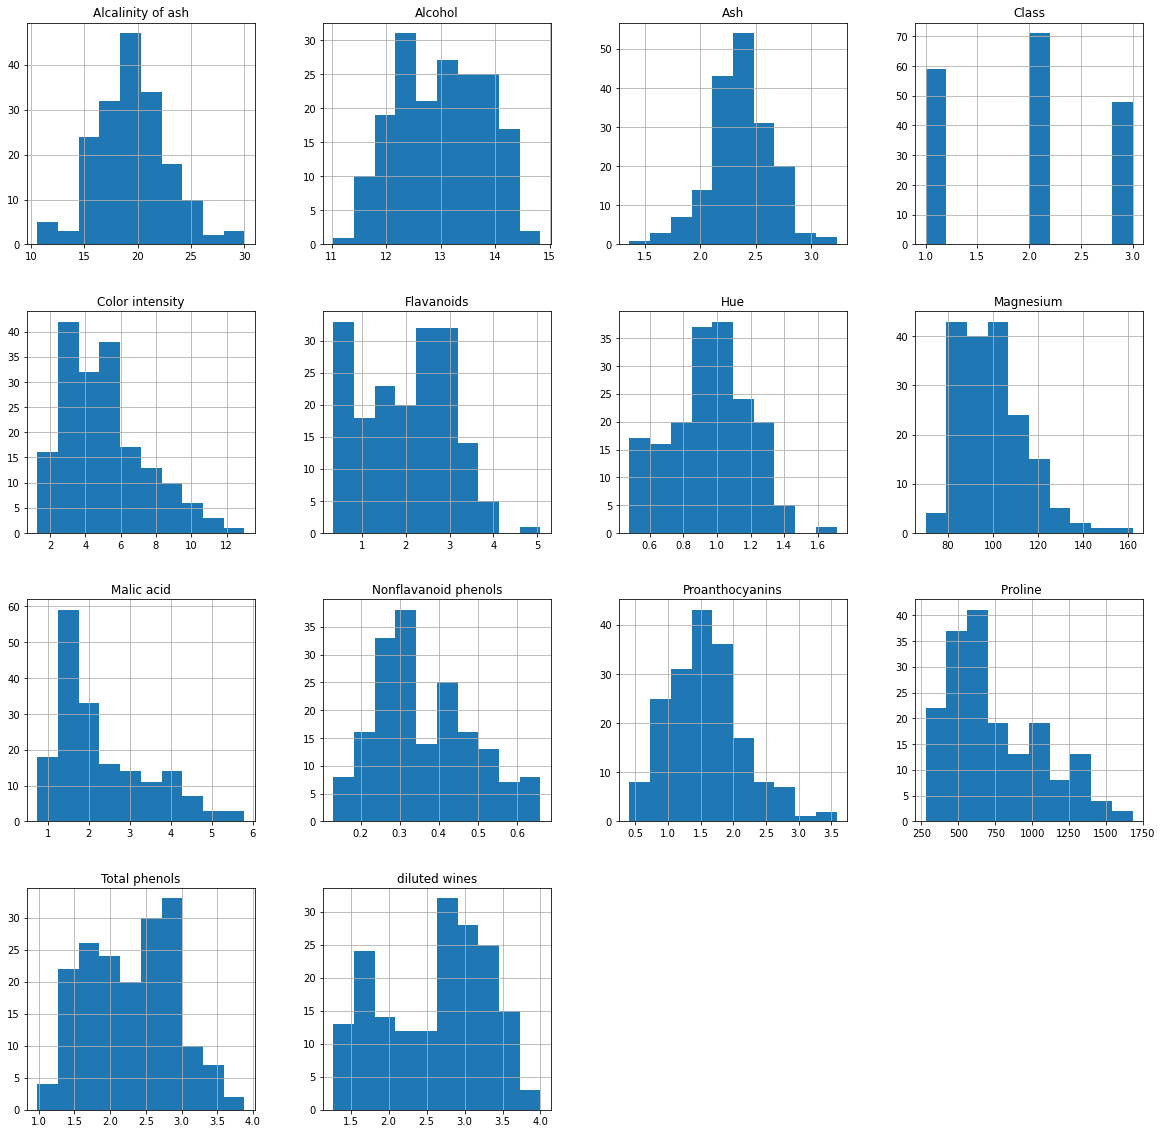

In [6]:
df.hist(figsize=(20,20))
#we can observe that the features are not normally distributed, So the Skewness of the data must be removed 

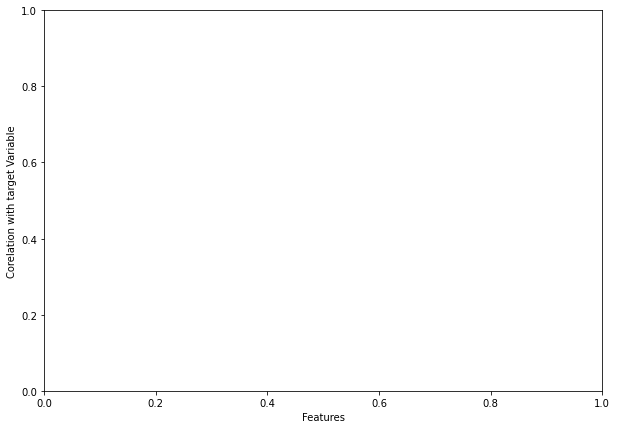

Alcalinity of ash       0.517859
Nonflavanoid phenols    0.489109
Malic acid              0.437776
Color intensity         0.265668
Ash                    -0.049643
Magnesium              -0.209179
Alcohol                -0.328222
Proanthocyanins        -0.499130
Hue                    -0.617369
Proline                -0.633717
Total phenols          -0.719163
diluted wines          -0.788230
Flavanoids             -0.847498
Name: Class, dtype: float64

In [7]:
plt.figure(figsize=(10,7))
df.corr()["Class"].sort_values(ascending=False).drop(["Class"])
plt.xlabel("Features")
plt.ylabel("Corelation with target Variable")
plt.show()
df.corr()["Class"].sort_values(ascending=False).drop(["Class"])


Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

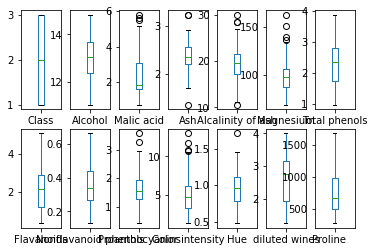

In [18]:
df.plot(kind="box",subplots=True,layout=(2,7))
#As we observe there are few outliers in the data 

In [19]:
df.skew()
#we can say that "Malic acid" and "Magnesium" have high Skewness 
# So the skewness should be treated

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.21394365, 1.51861254, 0.5622498 , ..., 0.36217728, 1.84791957,
        1.01300893],
       [1.21394365, 0.24628963, 0.49941338, ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [1.21394365, 0.19687903, 0.02123125, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [1.37386437, 0.33275817, 1.74474449, ..., 1.61212515, 1.48544548,
        0.28057537],
       [1.37386437, 0.20923168, 0.22769377, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.37386437, 1.39508604, 1.58316512, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [21]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


# Percentage loss in data after removal of Skewness


In [22]:
print("Original Shape",df.shape,"New Shape",df_new.shape)
Percntage_loss=(10/178)*100
print(Percntage_loss)

Original Shape (178, 14) New Shape (168, 14)
5.617977528089887


As we can see there is loss of 5.6% data from the dataset we are going a head with outliers removed 

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Class                     2.0000
Alcohol                   1.3150
Malic acid                1.4800
Ash                       0.3475
Alcalinity of ash         4.3000
Magnesium                19.0000
Total phenols             1.0575
Flavanoids                1.6700
Nonflavanoid phenols      0.1675
Proanthocyanins           0.7000
Color intensity           2.9800
Hue                       0.3375
diluted wines             1.2325
Proline                 484.5000
dtype: float64


In [25]:
df.new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.new1.shape

(161, 14)

In [26]:
Percntage_loss=(17/178)*100
print(Percntage_loss)

9.550561797752808


As the percentage loss using zscore is less we will go ahead with df_new 


In [27]:
y=df_new.iloc[:,:1]
x=df_new.iloc[:,1:]

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [31]:
max_scr=0
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test)*100)

As we can see the model perfomes well in many cases, so Let us consdider randomstate=36

In [38]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20) 
    num_folds = 10
    seed = 7
    scoring = 'accuracy'
    

In [39]:
pred=lr.predict(x_test)
pred

array([2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 2], dtype=int64)

In [40]:
#Logistic Regression
lr.fit(x_train,y_train)
print("accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score: 0.9705882352941176
[[10  0  0]
 [ 0 15  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.94      1.00      0.97        15
           3       1.00      0.89      0.94         9

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



In [41]:
#SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
#svc.score(x_trian,y_tarin)
predsvc=svc.predict(x_test)
print("accuracy score:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score: 0.7058823529411765
[[ 8  0  2]
 [ 0 12  3]
 [ 0  5  4]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.71      0.80      0.75        15
           3       0.44      0.44      0.44         9

    accuracy                           0.71        34
   macro avg       0.72      0.68      0.69        34
weighted avg       0.72      0.71      0.71        34



In [42]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
svc.fit(x_train,y_train)
#svc.score(x_trian,y_tarin)
predsvc=svc.predict(x_test)
print("accuracy score:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score: 0.7058823529411765
[[ 8  0  2]
 [ 0 12  3]
 [ 0  5  4]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.71      0.80      0.75        15
           3       0.44      0.44      0.44         9

    accuracy                           0.71        34
   macro avg       0.72      0.68      0.69        34
weighted avg       0.72      0.71      0.71        34



In [52]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(1)),
    ]

In [53]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.691758 (0.120415)
Logistic Regression: 0.954945 (0.061026)
Decision Tree: 0.902198 (0.076954)
Naive Bayes: 0.984615 (0.030769)
KNearest Neighbors: 0.714835 (0.079374)


We can observe that "LogisticRegression" and Naive Bayes Mobels are perfoming the best 
so we can try to imporove the score further by scaling the mobels and variables 

In [48]:
#Scaling Naive Bayes

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GaussianNB()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledx, y_train)

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.984615 using {'var_smoothing': 0.1873817422860384}
#98 0.970330 (0.059392) with: {'var_smoothing': 1.0}
#98 0.970330 (0.059392) with: {'var_smoothing': 0.8111308307896871}
#93 0.978022 (0.046363) with: {'var_smoothing': 0.657933224657568}
#93 0.978022 (0.046363) with: {'var_smoothing': 0.533669923120631}
#93 0.978022 (0.046363) with: {'var_smoothing': 0.43287612810830584}
#93 0.978022 (0.046363) with: {'var_smoothing': 0.3511191734215131}
#93 0.978022 (0.046363) with: {'var_smoothing': 0.2848035868435802}
#98 0.970330 (0.048414) with: {'var_smoothing': 0.23101297000831597}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.1873817422860384}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.15199110829529336}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.12328467394420659}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.1}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.08111308307896872}
#1 0.984615 (0.030769) with: {'var_smoothing': 0.0657933224657568}
#1 0.984615 (0.030769)

As we Where not able to imporve the model perfomance. now we can check for  LogisticRegression 

In [50]:
#define models and parameters
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledx, y_train)

In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.985165 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#5 0.978022 (0.046363) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
#5 0.978022 (0.046363) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
#5 0.978022 (0.046363) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
#5 0.978022 (0.046363) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
#5 0.978022 (0.046363) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
#5 0.978022 (0.046363) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
#5 0.978022 (0.046363) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
#5 0.978022 (0.046363) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
#1 0.985165 (0.029696) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#1 0.985165 (0.029696) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#1 0.985165 (0.029696) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
#1 0.985165 (0.029696) with: {'C': 0.1, 'penalty': 'l2', 'solver': 

LogisticRegression() has perfomed best among the the models we choose with 98.5% accuracy compare to 98.4% by GaussianNB()
Best Perfoming with 98.51% using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'} parameters


In [56]:
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
model = LogisticRegression(C= 1.0, penalty='l2', solver= 'liblinear')
model.fit(scaledx, y_train)

LogisticRegression(solver='liblinear')

In [57]:
scaledtestx = scaler.transform(x_test)
predictions = model.predict(scaledtestx)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[10  0  0]
 [ 0 15  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         9

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



Model has perfomed better than expected with a 100% Accuracy 


In [58]:
import joblib
joblib.dump(model,"wineproject.pkl")

['wineproject.pkl']